Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

1. R&D Spend -- Research and devolop spend in the past few years
2. Administration -- spend on administration in the past few years
3. Marketing Spend -- spend on Marketing in the past few years
4. State -- states from which data is collected
5. Profit  -- profit of each state in the past few years


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
Data = pd.read_csv('/content/50_Startups.csv')
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
Data1 = Data.rename({'R&D Spend' : 'R','Administration' : 'A', 'Marketing Spend' : 'M'},axis=1)

In [ ]:
Data1[Data1.duplicated()]

,R,A,M,State,Profit


In [ ]:
Data1.describe()

,R,A,M,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
Data1.corr()

<ipython-input-14-0c3bffaa8ba9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data1.corr()


,R,A,M,Profit
R,1.000000,0.241955,0.724248,0.972900
A,0.241955,1.000000,-0.032154,0.200717
M,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


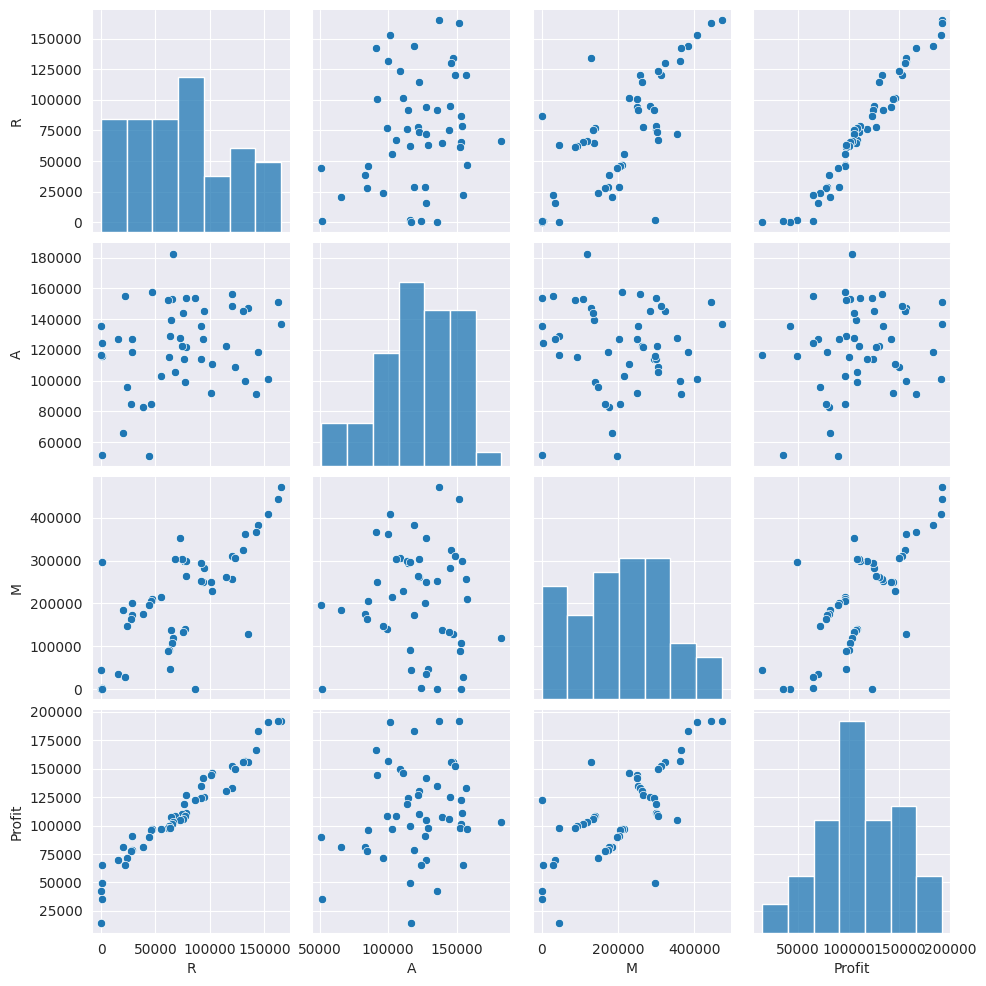

In [ ]:
sns.set_style(style="darkgrid")
sns.pairplot(Data1)

In [ ]:
Model = smf.ols("Profit~R+A+M", data=Data1).fit()

In [ ]:
Model.params

Intercept    50122.192990
R                0.805715
A               -0.026816
M                0.027228
dtype: float64

In [ ]:
Model.tvalues,np.round(Model.pvalues, 5)

(Intercept     7.626218
 R            17.846374
 A            -0.525507
 M             1.655077
 dtype: float64,
 Intercept    0.00000
 R            0.00000
 A            0.60176
 M            0.10472
 dtype: float64)

In [ ]:
Model.rsquared, Model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Model Accuarcy is 94.753%

In [ ]:
slr_a = smf.ols("Profit~A", data=Data1).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    3.040044
 A            1.419493
 dtype: float64,
 Intercept    0.003824
 A            0.162217
 dtype: float64)

In [ ]:
slr_m = smf.ols("Profit~M", data=Data1).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept    7.808356
 M            7.802657
 dtype: float64,
 Intercept    4.294735e-10
 M            4.381073e-10
 dtype: float64)

In [ ]:
mlr_am = smf.ols("Profit~A+M", data=Data1).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept    1.142741
 A            2.467779
 M            8.281039
 dtype: float64,
 Intercept    2.589341e-01
 A            1.729198e-02
 M            9.727245e-11
 dtype: float64)

# Model Validation

In [ ]:
rsq_r = smf.ols("R~A+M", data=Data1).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a=smf.ols("A~R+M",data=Data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("M~R+A",data=Data1).fit().rsquared
vif_m=1/(1-rsq_m)

D1={'Variables':['R','A','M'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(D1)
Vif_df

,Variables,Vif
0,R,2.468903
1,A,1.175091
2,M,2.326773


In [ ]:
(c,_)=Model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

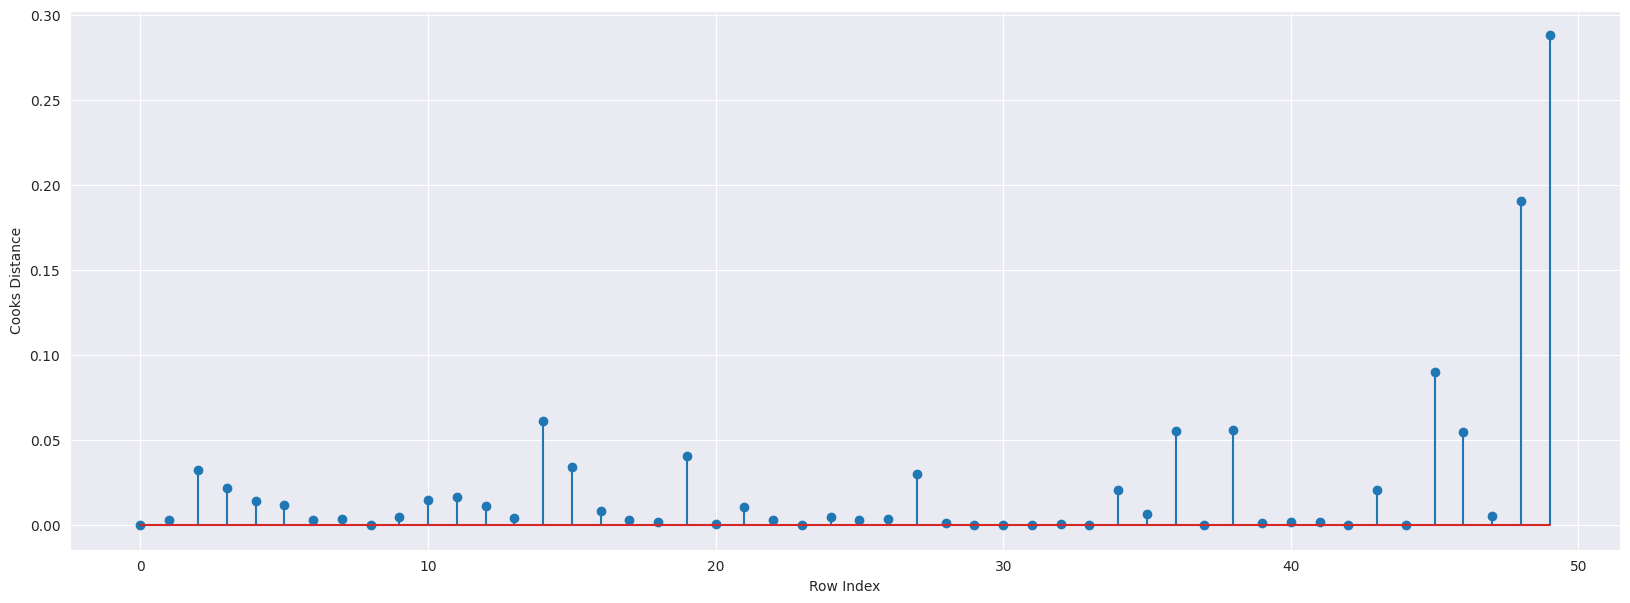

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

In [ ]:
K=Data1.shape[1]
N=Data1.shape[0]
leverage_cutoff = (3*(K+1))/N
leverage_cutoff

0.36

In [ ]:
Data1[Data1.index.isin([49])]

,R,A,M,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
Data2=Data1.drop(Data1.index[[49]],axis=0).reset_index(drop=True)
Data2.head()

,R,A,M,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
while np.max(c)>0.5 :
    Model=smf.ols("Profit~R+A+M",data=data2).fit()
    (c,_)=Model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Data2=Data2.drop(Data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~R+A+M",data=Data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared*100,"%")

Thus model accuracy is improved to 96.13162435129847 %


In [ ]:
Data2.head()

,R,A,M,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
new_data=pd.DataFrame({'R':70000,"A":90000,"M":140000},index=[0])
new_data

,R,A,M
0,70000,90000,140000


In [ ]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [ ]:
pred_y=final_model.predict(Data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
D2={'Prep_Models':['Model','Final_Model'],'Rsquared':[Model.rsquared,final_model.rsquared]}
Table=pd.DataFrame(D2)
Table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
